In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib
import pickle
res1 = 1001.44
res2 = [10000.12,10000.13,10000.14,10000.15,10000.16,10000.17,10000.23,10000.24,10000.25,10000.26,10000.27,10000.34,10000.35,10000.36,10000.37,10000.45,10000.46,10000.47,10000.56,10000.57,10000.67]
parameters = []
color1=0
number_of_resistor = 21
#0 is DUT
#1 is ref
def func(x, A, B):
    return A*x+ B
data = []
for ohm in res2:
    with open("step1_ex0_res_"+str(ohm)+'.pkl',"rb") as handle:
        A = pickle.load(handle)
#print(A)
    n = len(A)      # number of voltage
    m = len(A.get(list(A.keys())[0]))       # number of measurement in each voltage
#print(n,m)
    B = {}       # temporary storage: 
    C = []       # [input voltage, V1/V2, 1 sigma error]
    for i in range(n):      
        for j in range(m):
            ratio = A.get(list(A.keys())[i])[j][0]/A.get(list(A.keys())[i])[j][1]
            C.append(ratio)
    mean = np.mean(C)
    std = np.std(C, ddof = 1)/((n*m)**0.5)    
    data.append([mean,std])
datatranspose = np.transpose(data)
print(datatranspose)
reference_resistance = 20000*(1+number_of_resistor)/(1+np.sum(datatranspose[0]))
asdf = []
for i in range(number_of_resistor):
    asdf.append((1000*(1+number_of_resistor)/((1+np.sum(datatranspose[0]))**2)*datatranspose[1][i])**2)
reference_std = np.mean(asdf)**0.5
print(reference_resistance, reference_std)

[[1.03395974e+00 1.03366308e+00 1.03912486e+00 1.04402728e+00
  1.03674977e+00 1.04002126e+00 1.03015233e+00 1.03475671e+00
  1.04014866e+00 1.03211278e+00 1.03598022e+00 1.03559373e+00
  1.04089458e+00 1.03303965e+00 1.03670794e+00 1.04622671e+00
  1.03818193e+00 1.04216539e+00 1.04317111e+00 1.04758301e+00
  1.03879431e+00]
 [8.06057608e-06 8.06143947e-06 8.01332072e-06 8.39168236e-06
  8.07777435e-06 8.09540006e-06 8.49312732e-06 9.59008369e-06
  8.21490841e-06 8.35411974e-06 8.33525689e-06 8.05756919e-06
  8.19267140e-06 8.18980549e-06 7.90096304e-06 8.11139002e-06
  8.23289694e-06 8.92978608e-06 8.29759800e-06 8.29861608e-06
  8.45418899e-06]]
19295.660120160814 0.0003516037365726531


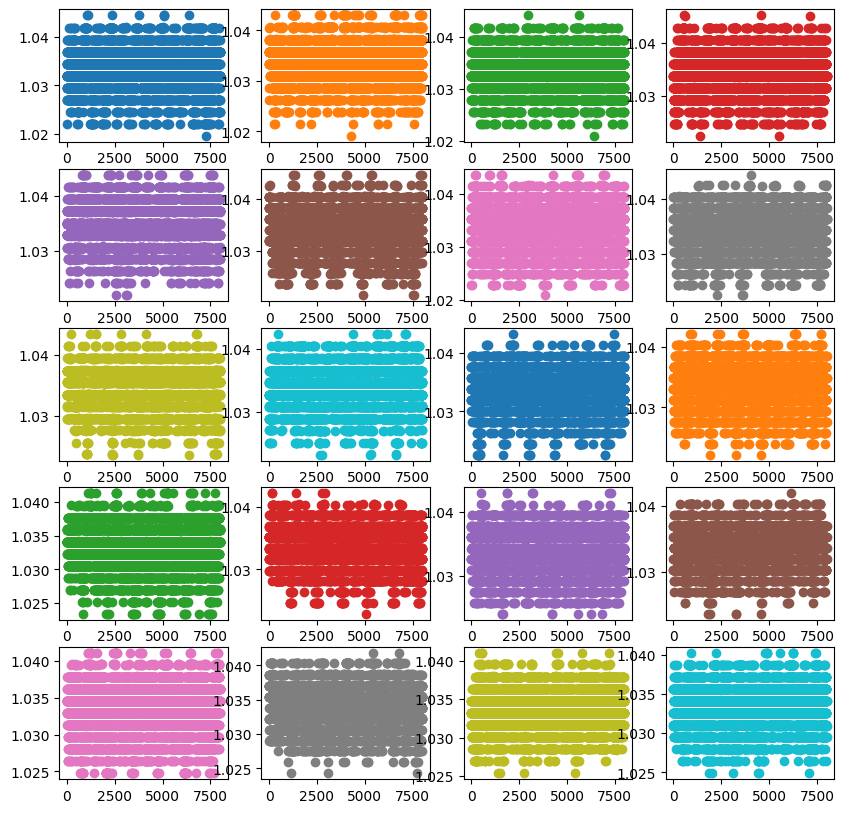

In [8]:
with open("step1_ex0_res_10000.12.pkl","rb") as handle:
    A = pickle.load(handle)

m = len(A.get(list(A.keys())[0]))
n = len(A)
x = []
ratio = []
color1 = 0
fig, ax = plt.subplots(5,4)
for i in range(n):
    x = []
    ratio = []
    color2 = 'C'+str(color1)
    for j in range(m):
        x.append(j)
        ratio.append(A.get(list(A.keys())[i])[j][0]/A.get(list(A.keys())[i])[j][1])
    if i%4==0:
        ax[i//4][0].scatter(x,ratio,color=color2)
    elif i%4==1:
        ax[i//4][1].scatter(x,ratio,color=color2)
    elif i%4==2:
        ax[i//4][2].scatter(x,ratio,color=color2)
    else:
        ax[i//4][3].scatter(x,ratio,color=color2)
    color1+=1
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()